In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 3.1 $\quad$ Introducción a la optimización media-varianza

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Cuando se trabaja con un conjunto de carteras aleatorias representadas como una nube de puntos en un espacio de rendimiento y riesgo, tal y como hemos hecho hasta ahora, se pueden observar diversas combinaciones de activos que ofrecen diferentes niveles de rendimiento y riesgo. La pregunta entonces es, **¿cuáles son las carteras eficientes?**. La optimización media-varianza busca identificar la cartera óptima dentro de esta nube de puntos, es decir, aquella cartera que proporciona el máximo rendimiento esperado para un nivel de riesgo dado o, alternativamente, el mínimo riesgo para un nivel de rendimiento objetivo.

Antes de entrar en detalle, veamos de nuevo una aproximación generando 2000 carteras aleatorias para 4 activos.

In [8]:
#leo los datos y calculo retornos
data = pd.read_csv("../data/data.csv",index_col=0, parse_dates=True)
retornos = np.log(data).diff().dropna()

In [9]:
#defino número de activos y carteras
num_act = retornos.shape[1]
num_carteras = 2000

In [10]:
#genero pesos aleatorios
rng= np.random.default_rng(seed=123)
pesos = rng.random((num_carteras, num_act))
pesos /= np.sum(pesos, axis=1)[:, None] #normalizo

In [11]:
#calculo retornos y volatilidades
ret_carteras = retornos @ pesos.T

volatilidades = np.sqrt(np.var(ret_carteras)*252)
rentabilidades = 252*np.mean(ret_carteras, axis=0)

Dado un **riesgo máximo** asumible de 0.13, ¿cuál es la cartera eficiente? El código siguiente genera una figura donde poder discutir qué decisión tomamos.

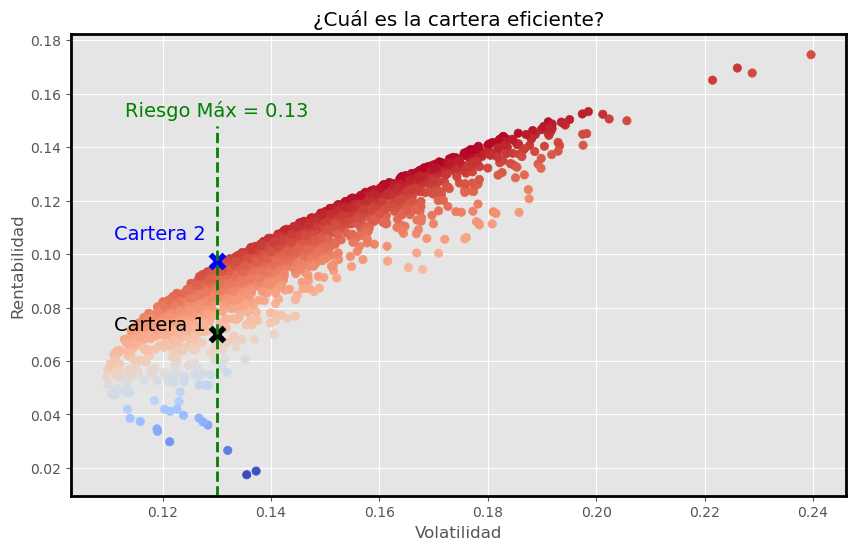

In [7]:
#grafico

plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rentabilidades, c=rentabilidades / volatilidades, marker='o', cmap='coolwarm')
plt.xlabel('Volatilidad')
plt.ylabel('Rentabilidad')
plt.title('¿Cuál es la cartera eficiente?')
#plt.colorbar(label='Sharpe ratio')

# Añadir un segmento vertical
plt.axvline(x=0.13, ymin=0, ymax=0.8, color='green', linestyle='--', linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.13, 0.15, 'Riesgo Máx = 0.13', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color='green')


# Añadir puntos específicos
plt.scatter(0.13, 0.07, color='black', marker='x', s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.13, 0.0975, color='blue', marker='x', s=100, linewidths=4) # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.128, 0.07, 'Cartera 1', fontsize=14, verticalalignment='bottom', horizontalalignment='right', color = 'black')
plt.text(0.128, 0.104, 'Cartera 2', fontsize=14, verticalalignment='bottom', horizontalalignment='right', color='blue')

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)


plt.show()


También podemos hacerlo partiendo de un rendimiento mínimo. Dada una **rentabilidad mínima exigida** de un 0.08, ¿cuál es la cartera eficiente? Veamos la siguiente figura para discutirlo.

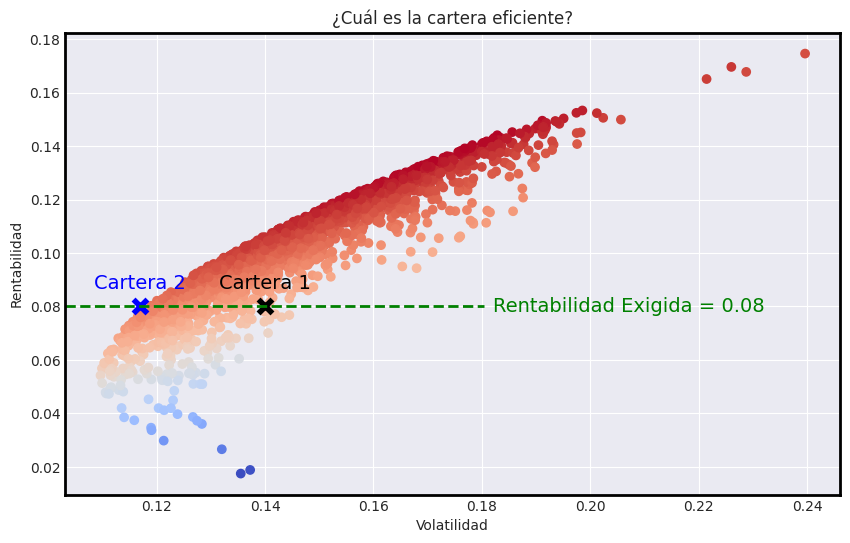

In [ ]:
#grafico

plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rentabilidades, c=rentabilidades / volatilidades, marker='o', cmap='coolwarm')
plt.xlabel('Volatilidad')
plt.ylabel('Rentabilidad')
plt.title('¿Cuál es la cartera eficiente?')
#plt.colorbar(label='Sharpe ratio')

# Añadir un segmento vertical
plt.axhline(xmin=0, xmax=0.54, y=0.08, color='green', linestyle='--', linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.182, 0.08, 'Rentabilidad Exigida = 0.08', fontsize=14, verticalalignment='center', horizontalalignment='left', color='green')


# Añadir puntos específicos
plt.scatter(0.14, 0.08, color='black', marker='x', s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.117, 0.08, color='blue', marker='x', s=100, linewidths=4) # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.14, 0.085, 'Cartera 1', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color = 'black')
plt.text(0.117, 0.085, 'Cartera 2', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color='blue')

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)


plt.show()

La optimización media-varianza de carteras es una herramienta fundamental en el mundo de las finanzas que busca maximizar el rendimiento esperado de una cartera de activos mientras se minimiza el riesgo asociado. Este enfoque se basa en la teoría moderna de carteras desarrollada por Harry Markowitz en la década de 1950, que establece que los inversores pueden construir carteras óptimas que ofrecen el mejor equilibrio posible entre rendimiento y riesgo. 

En resumen, la optimización media-varianza es una herramienta poderosa que proporciona un marco sistemático para la construcción y gestión de carteras de inversión, ayudando a los inversores a alcanzar sus metas financieras de manera más efectiva y eficiente.

## 1. La función de utilidad del inversor

Para definir carteras eficientes, es esencial considerar la **función de utilidad del inversor**, una herramienta fundamental que refleja cómo valora el riesgo y el retorno en sus inversiones y actúa como un barómetro que cuantifica la satisfacción o felicidad derivada de una inversión, permitiendo así evaluar las preferencias del inversor en términos de riesgo y rendimiento.

Esta función refleja la aversión al riesgo del inversor: aquellos con una mayor aversión prefieren inversiones más seguras con rendimientos modestos, mientras que los inversores menos aversos pueden estar dispuestos a asumir mayores riesgos en busca de retornos más altos. De este modo, una cartera que sea óptima para un inversor con baja aversión al riesgo podría no serlo para otro inversor con una aversión menor. Por lo tanto, la definición de eficiencia en la construcción de carteras no es universal, sino que **depende de las preferencias individuales de cada inversor**, reflejadas en su función de utilidad.

En resumen, la función de utilidad:

- Define cómo un inversor valora riesgo y retorno.

- Cuantifica satisfacción o felicidad de una inversión.

- Considera la aversión al riesgo del inversor.

- Inversores aversos al riesgo prefieren inversiones seguras con rendimientos menores.

- Inversores con baja aversión al riesgo eligen inversiones arriesgadas con posibles mayores retornos.

Esta comprensión de la función de utilidad del inversor es crucial para personalizar la construcción de carteras, asegurando que se ajusten tanto a los objetivos de rendimiento como a la tolerancia al riesgo de cada individuo. En última instancia, la optimización de carteras se vuelve más precisa y significativa cuando se incorporan las preferencias individuales de los inversores, lo que conduce a una toma de decisiones más informada y al logro de los objetivos financieros de manera más efectiva.

Por lo tanto, para resolver este problema, debemos definir una función de utidad relacionada con la riqueza futura $U(\tilde{w})$:

$$\tilde{w} = \tilde{w}_0 (1+r_p(w))$$

$$U(\tilde{w}) = U(\tilde{w}_0(1+r_p(w)))$$

donde:

- $w$ es la cartera aleatoria,

- $r_p(w)$ es la rentabilidad de la cartera $w$,

- $\tilde{w}_0$ es la riqueza inicial, 

- $\tilde{w}$ es la riqueza al finalizar el periodo.
 
La función de utilidad está vinculada a la riqueza futura, lo que significa que la satisfacción del inversor está relacionada con la riqueza que se espera tener en el futuro. En este contexto, podemos hablar de maximizar la utilidad:

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0(1+r_p(w)))\right]$ $\qquad$ donde:  $\  r_p(w) = \sum_i{w_ir_i}$

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0\left(1+\sum_{i=1}^N{w_ir_i}\right))\right]$

donde:

- $w_i$ es el peso de la cartera $w$ para el activo $i$-ésimo.

- $r_i$ es la rentabilidad del activo $i$-ésimo.

Para optimizar, calculamos las Condiciones de primer orden (FOC) (First Order Conditions), condiciones necesarias que deben cumplirse para que un punto sea mínimo, máximo o punto de silla de una función:

$\qquad$ $\Large \frac{\partial f(w)}{w_i}$  $=U' \left(\tilde{w}_0+\sum_i{w_ir_i}\right)r_i=0$

$\qquad$ $\Large \frac{\partial^2 f(w)}{w_i^2}$ $=U'' \left(\tilde{w}_0+\sum_i{w_ir_i}\right)r^2_i<0$

Estas condiciones indican que en un punto óptimo, el cambio incremental (la primera derivada) en cualquier dirección debe ser nulo, lo que implica un máximo, mínimo o punto de silla. Además, estamos buscando que la segunda derivada sea menor que 0, es decir, estamos interesados en encontrar un punto crítico que sea máximo en la función objetivo. En otras palabras, estamos buscando puntos donde la función tenga una concavidad hacia abajo.

Pensemos en el siguiente caso: 

$$f(x) = -x^2$$

<img src="../../imgs/concavo.jpg" width="40%">

Por tanto, la primera y segunda derivada son:

$\qquad$ $f'(x) = -2x$

$\qquad$ $f''(x) = -2$

Si esa fuese mi función de utilidad, querríamos buscar el punto donde:

$\qquad$ $f'(x) = 0 \rightarrow x = 0$

$\qquad$ $f''(x) = -2 < 0$

Esto significa que el punto óptimo es $x=0$ ya que es el máximo con forma cóncava.

<font color="red">CHRIS: El párrafo siguiente lo sigo sin tener claro. ¿Qué queremos decir con esto si acabamos de decir que para optimizar, U' debe ser 0?</font>

La teoría económica indica que:

- $U'(\tilde{w})$ debe ser positivo ya que el inversor prefiere más rentabilidad.

- $U''(\tilde{w})$ debe ser negativa para reflejar la aversión al riesgo.

Sin embargo, aún no hemos incorporado la aversión al riesgo del inversor. **Markowitz**, premio Nobel de Economía, es el autor de la Teoría Moderna de Carteras como un problema de **optimización de media-varianza** a la que se llega haciendo una de las siguientes hipótesis:

- **La función de utilidad es cuadrática**, lo que significa que su aversión al riesgo se puede expresar de manera cuadrática. Esta hipótesis proporciona una base para la optimización media-varianza, ya que la varianza es una medida cuadrática de la dispersión.

- **Los rendimientos siguen una distribución normal**, lo que significa que los rendimientos se caracterizan completamente por su media (esperanza) y su varianza. Esta simplificación facilita los cálculos y el análisis en el marco de la optimización media-varianza.

Markowitz propone maximizar la siguiente función de utilidad:

$$\max_{w} \frac{w^T \mu - r_f}{\sqrt{w^T \Sigma w}}, \tag{1}$$

donde:

- $\mu$ es el vector de retornos esperados

- $r_f$ es el activo libre de riesgo

- $\Sigma$ es la matriz de varianzas-covarianzas

<font color="red">CHRIS: ¿Pero la fórmula que viene ahora es la fórmula modificada para optimización convexa. Markowitz no propone maximizar el ratio de sharpe? Lo dejo apuntado justo arriba y lo vemos el viernes:</font>


$$\underset{w}{\max} f(w)=w^T\mu-\lambda w^T\Sigma w \tag{2}$$

donde:

- $\mu$ es la matriz de los retornos esperados

- $ \lambda$ es el coeficiente de aversión al riesgo (o tolerancia al riesgo)

- $ \Sigma$ es la matriz de varianzas-covarianzas


Dos inversores pueden tener distinta tolerancia al riesgo y por lo tanto tener distintas carteras eficientes.




SI calculamos la primera derivada e igualamos a cero:

$$\frac{\partial f(w)}{\partial w}=\mu-\lambda \Sigma w=0$$
<br>

Dado que la función $f(w)$ es cóncava, la condición de primer orden define un único máximo. Por tanto:

$$w=\frac{1}{2\lambda}\Sigma^{-1} \tag{3}\mu$$

<font color="red">CHRIS: ¿De donde sale el 1/2 al despejar la derivada?</font>


**NOTA** más adelante veremos como el componente $\Sigma^{-1}$ (inversa de la matriz de covarianzas) supone un reto a la hora de optimizar carteras.

## 2. MEDIA-VARIANZA: Frontera Eficiente

Con todo esto, podemos plantear el problema de calcular la frontera eficiente como un **problema de optimización**.

<font color="red">CHRIS: ¿Seguro que este replanteamiento es correcto? No entiendo por qué desaparece $w^T\mu$</font>

En nuestro caso, podemos replantear la ecuación (2) como:

$\qquad \underset{m}{max} (-w^T\Sigma w)$

$\qquad$ s.t. $\ w^T \mu = \hat{\mu}$

donde $\hat{\mu}$ es el rendimiento esperado por el inversor.

OJO: AL maximizar la varianza con signo menos, es lo mismo que minimizar la varianza

<font color="red">CHRIS: $\upsilon$ en el lagrangiano para qué se utiliza si no aparece en la ecuación?</font>

Utilizando Lagrange para resolver el problema:

$$\mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda\left( w^T\mu-\hat{\mu}\right) \tag{4}$$

La condición de primer orden del proceso de optimización será:

$$\frac{\partial \mathcal{L}}{\partial w}=-2\Sigma w+ \lambda \mu = 0 \tag{5.1}$$

$$\frac{\partial \mathcal{L}}{\partial \lambda} =w^T\mu-\hat{\mu} = 0 \tag{5.2}$$


Resolvemos el sistema de ecuaciones:

$$\lambda \mu = 2\Sigma w \tag{6}$$

$$w = \frac{\lambda}{2} \Sigma^{-1} \mu \tag{7}$$


Utilizamos la ecuación (5.2) para despejar $\lambda$:

$$ w^T\mu = \hat{\mu}$$

$$\left(\lambda \Sigma^{-1} \mu  \right)^T\mu = 2\hat{\mu}$$
$$\boxed{\lambda =\frac{2\hat{\mu}}{\mu^T\Sigma^{-1} \mu}}\tag{8}$$


En realidad, calculamos las carteras eficientes mediante **problemas de optimizacón** y vamos a resolverlos numéricamente. Vamos a estudiar una introducción a la optimización y a las librerías que existen en Python para resolver este tipo de problemas. Una vez aprendidos los mecanismos de resolución de problemas de optimización que hay en Python, volveremos a calcular más ejemplos de carteras eficientes.

# NOTAS ADICIONALES

### CARTERA EFICIENTE CON MÁS DE UNA RESTRICCIÓN:

Añadimos una nueva restricción que es que tenemos que invertir el dinero que tenemos (ni más ni menos):

- La suma de los pesos de los activos tiene que ser igual a 1

El nuevo problema de optimización lo podemos escribir como:

$\qquad \underset{w}{min} \left(w^T\Sigma w\right)$

$\qquad s.t. \quad w^TR=\hat{R}$

$\qquad \qquad w^T1=1$


Volvemos a utilizar el Langranjiano

$\qquad \mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda_1\left( w^TR-\hat{R}\right)+\lambda_2\left( w^T1-1 \right)$

Desarrollamos la condición de primer orden:

$\qquad \frac{\partial L}{\partial w}=-2\Sigma w+ \lambda_1 R+\lambda_2 1=0$

$\qquad \frac{\partial L}{\partial \lambda_1} =w^TR-\hat{R}=0$

$\qquad \frac{\partial L}{\partial \lambda_2} =w^T1-1=0$


La resolución del sistema de ecuaciones nos lleva a:

$\qquad w = \frac{1}{d}\left[c\Sigma^{-1}R-a\Sigma^{-1} 1 \right]\hat{R}+\frac{1}{d}\left[b\Sigma^{-1} 1-a\Sigma^{-1} R \right]$

$\qquad a = 1^T\Sigma^{-1}R$

$\qquad b = R^T\Sigma^{-1}R$ 

$\qquad c = 1^T\Sigma^{-1}1$

$\qquad a = bc-a^2$

### Cartera de mínima varianza

La cartera de mínima varianza se obtiene solucionando el siguiente problema de optimización:
$$\begin{gather}
\underset{w}{min} \left(w^T\Sigma w\right) \tag{24}\\
s.t. w^T1=1 \nonumber
\end{gather}$$

Estimamos el Lagranjiano y aplicamos la condición de primer orden

$$\begin{align}
\mathcal{L}(w,\lambda)&=\left(-w^T\Sigma w\right)-\lambda\left( w^T1=1\right)  \tag{24} \\
\frac{\partial L}{\partial w}&=2\Sigma w- \lambda 1=0 \tag{25} \\
\frac{\partial L}{\partial \lambda} &=w^T1-1=0 \tag{26}
\end{align} $$

El sistema de ecuaciones nos lleva a la siguiente solución:
$$w=\frac{\Sigma^{-1}1}{1^T\Sigma^{-1}1}$$